    This sales advertisment dataset is a work dataset for the project. 
In this notebook the dataset will be preproccessed for further exploratory analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('c:/users/admin/ps4/vehicles_us.csv')

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


The dataset contains 51,525 rows and 13 columns. Some columns have missing values:

- model_year: 4,619 missing values
- cylinders: 5,260 missing values
- odometer: 7,892 missing values
- paint_color: 9,267 missing values
- is_4wd: 25,953 missing values

    Next, I will perform Exploratory Data Analysis (EDA), including checking for duplicates, analyzing distributions, visualizing data, and filling missing values for one column using the groupby method. ​

In [4]:
# Check for duplicates
duplicates_count = df.duplicated().sum()
print(duplicates_count)

0


In [5]:
# Just to be sure, remove duplicates if found
data = df.drop_duplicates()
print(duplicates_count)

0


In [6]:
# Generate summary statistics for numerical columns
summary_statistics = df.describe()
print(summary_statistics)

               price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000  


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


Key Findings:

- Duplicates: No duplicate rows were found.
- Summary Statistics: Key metrics for numerical columns show the range and spread of data. 
- For instance:
- Price ranges from 1 to 375,000.
- Model year spans from 1908 to 2019, with a median of 2011.
- Odometer ranges from 0 to 990,000 miles.
- Missing Values: Significant gaps in columns like model_year, cylinders, odometer, paint_color, and is_4wd.

   Next, let's visualize the data distributions and replace missing values in the cylinders column using the groupby method.

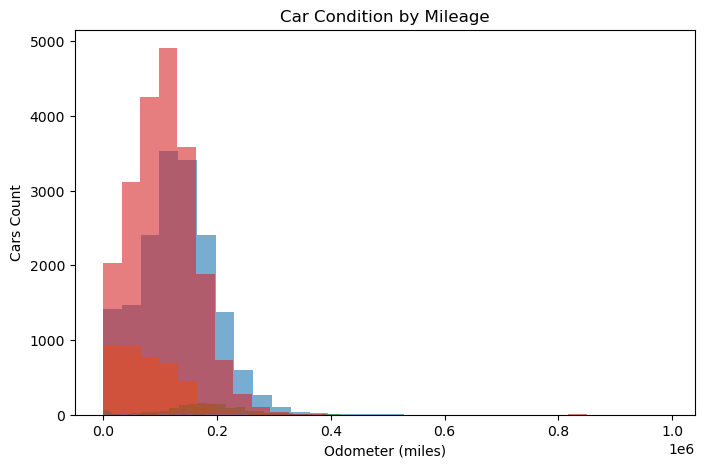

In [8]:
#Histogram for Car Condition by Mileage
plt.figure(figsize=(8, 5))
plt.title('Car Condition by Mileage')
plt.xlabel('Odometer (miles)')
plt.ylabel('Cars Count')
for condition in df['condition'].unique():
    subset = df[df['condition'] == condition]
    plt.hist(subset['odometer'], bins=30, alpha=0.6, label=condition)
    

Car Condition by Mileage:

Vehicles in "excellent" condition generally have lower mileage, while those in "fair" or "good" condition tend to cover a broader mileage range.
Higher mileage appears correlated with lower condition ratings.

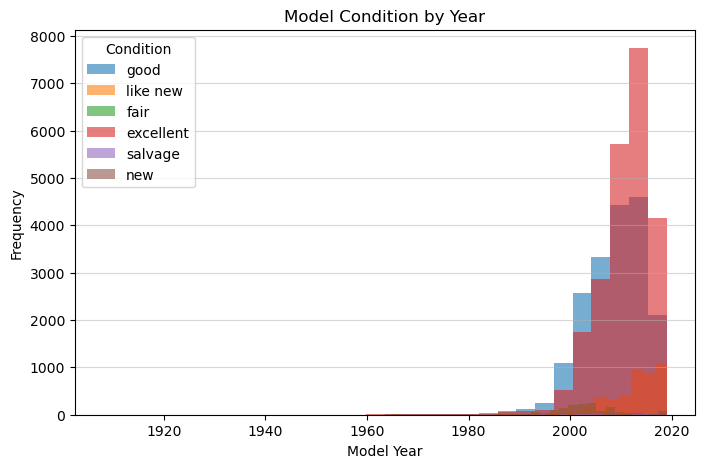

In [9]:
# Histogram for Model Condition by Year
plt.figure(figsize=(8, 5))
for condition in df['condition'].unique():
    subset = df[df['condition'] == condition]
    plt.hist(subset['model_year'], bins=30, alpha=0.6, label=condition)

plt.title('Model Condition by Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.legend(title='Condition')
plt.grid(axis='y', alpha=0.5)
plt.show()

Model Condition by Year:

Cars with more recent model years are more likely to be in "excellent" or "like new" condition.
Older model years show a concentration in "fair" or "good" conditions.

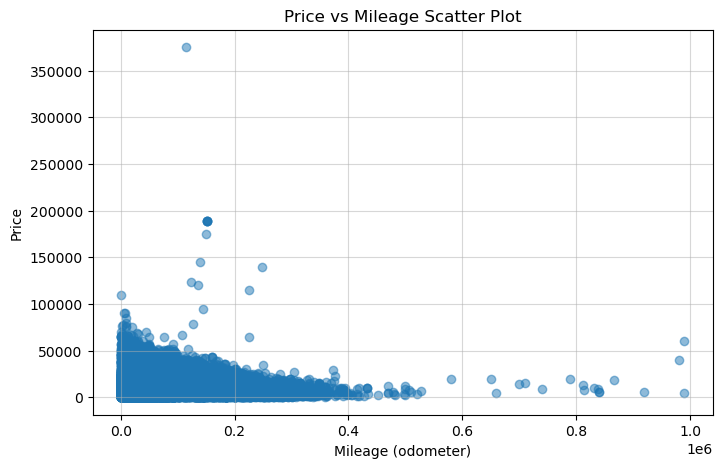

In [10]:
#Scatter Plot for Price vs Mileage
plt.figure(figsize=(8, 5))
plt.scatter(df['odometer'], df['price'], alpha=0.5)
plt.title('Price vs Mileage Scatter Plot')
plt.xlabel('Mileage (odometer)')
plt.ylabel('Price')
plt.grid(alpha=0.5)
plt.show()

Price vs Mileage:

There is an inverse relationship between mileage and price. Cars with higher mileage are typically priced lower.
Outliers are present, indicating some vehicles may be priced higher despite high mileage, possibly due to brand, model, or specific features.

In [11]:
# Replacing missing values in the 'cylinders' column using groupby and median
df['cylinders'] = df['cylinders'].fillna(
    df.groupby(['model', 'model_year'])['cylinders'].transform('median')
)

# Check for remaining missing values in 'cylinders'
remaining_cylinders_na = df['cylinders'].isnull().sum()
print(remaining_cylinders_na)

389


Missing Values:

   Missing values in the cylinders column were addressed using the groupby method, where the median number of cylinders was calculated for groups defined by model and model_year. Following this process, 389 entries in the cylinders column remain unfilled, likely due to a lack of sufficient data within certain groups.

Overall Conclusion:

 These insights can assist in making informed decisions about vehicle purchases or sales.